In [1]:
import numpy as np
from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
class MyLinearRegression:
    def __init__(self, learning_rate=0.001, epoch=1000):
        self.weights = None
        self.lr = learning_rate
        self.epoch = epoch
        self.losses = []
        self.bias = None

    def loss_function(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)
    def feed_forward(self, X):
        z = (X @ self.weights) + self.bias
        return z

    def fit(self, X, y):
        samples, features = X.shape
        self.weights = np.random.randn(features, 1) * 0.001
        self.bias = 0

        y = y.reshape(-1, 1)  

        for _ in range(self.epoch):
            f = self.feed_forward(X)
            loss = self.loss_function(y, f)
            self.losses.append(loss)

            dw = (2 / samples) * (X.T @ (f - y))
            db = (2 / samples) * np.sum(f - y)

            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db

            if _ % 100 == 0:
                print(f"Epoch {_}: Loss = {loss:.4f}")
                
    def predict(self, X):
            y_hat = (X @ self.weights) + self.bias
            return y_hat

In [7]:
X = np.linspace(20, 60, 20) + np.random.randn(20) * 3
y = np.linspace(20000, 120000, 20)+ np.random.randn(20) * 3

X = X.reshape(-1,1)
y = y.reshape(-1,1)

regressor = MyLinearRegression(learning_rate=0.0001, epoch=1000)
regressor.fit(X, y)
predictions = regressor.predict(X)
mse  = mean_squared_error(np.asarray(y), np.asarray(predictions))
print("Test MSE: {0:.3f}".format(mse))

Epoch 0: Loss = 5821138988.8665
Epoch 100: Loss = 97584620.2596
Epoch 200: Loss = 97416210.5330
Epoch 300: Loss = 97248425.0707
Epoch 400: Loss = 97081261.5587
Epoch 500: Loss = 96914717.6916
Epoch 600: Loss = 96748791.1725
Epoch 700: Loss = 96583479.7130
Epoch 800: Loss = 96418781.0331
Epoch 900: Loss = 96254692.8613
Test MSE: 96091212.935


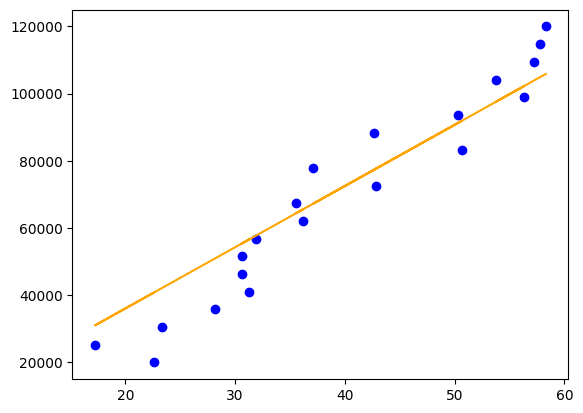

In [8]:
    plt.scatter( X, y, color = 'blue' ) 
      
    plt.plot( X, predictions, color = 'orange' ) 
      
    plt.show() 